In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#数学模型
class Network(object):
    def __init__(self,NUM):
        np.random.seed(0)
        self.w=np.random.randn(NUM,1)
        self.b=0.0
    def forward(self,x):
        return np.dot(x,self.w)+self.b
    def loss(self, z, y):
        error=abs(z-y)
        Num=error.shape[0]
        cost=error*error
        cost=np.sum(cost)/Num
        return cost
    #阶梯下降
    def G(self,x,y):
        z=self.forward(x)
        G_w=(z-y)*x
        G_w=np.mean(G_w,axis=0)
        G_w=G_w[:,np.newaxis]
        G_b=(z-y)
        G_b=np.mean(G_b)
        return G_w,G_b
    def updata(self,G_w,G_b,temp=0.01):
        self.w=self.w-temp*G_w
        self.b=self.b-temp*G_b
    def train(self,x,y,iterations=1000,eta=0.01):
        losses=[]
        for i in range(100):
            z=self.forward(x)
            L=self.loss(z,y)
            G_w,G_b=self.G(x,y)
            self.updata(G_w,G_b,eta)
            losses.append(L)
        return losses


    

In [7]:
f=pd.read_csv("test.csv",header=None)
for i in range(11):
    f.drop(f[f[i].str.contains(pat='NR',regex=False)].index,inplace=True)
f.drop(f[f[1].str.contains(pat='RAINFALL',regex=False)].index,inplace=True)
del f[0]
del f[1]
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4080 entries, 0 to 4319
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       4080 non-null   object
 1   3       4080 non-null   object
 2   4       4080 non-null   object
 3   5       4080 non-null   object
 4   6       4080 non-null   object
 5   7       4080 non-null   object
 6   8       4080 non-null   object
 7   9       4080 non-null   object
 8   10      4080 non-null   object
dtypes: object(9)
memory usage: 318.8+ KB


In [8]:
data=np.array(f,dtype=float)
data_real=data.mean(axis=1)
data_real=data_real.reshape((240,17))
data_real_max=data_real.max(axis=0)
data_real_min=data_real.min(axis=0)
# 归一化
for i in range(17):
    data_real[:,i]=(data_real[:,i]-data_real_min[i])/(data_real_max[i]-data_real_min[i])
# 抽取预测对象
data_PM25=data_real[:,9]
data_PM25=data_PM25[:,np.newaxis]
data_real=np.delete(data_real,9,axis=1)
# 数据分组
ratio=0.80
offset=int(ratio*data_real.shape[0])
training_data=data_real[:offset]
test_data=data_real[offset:]


In [9]:
data_real.shape[1]

16

In [10]:
# 获取数据
x=data_real
y=data_PM25
# 创建网络
net=Network(16)
# 启动训练
losses=net.train(x,y,iterations=1000,eta=0.01)


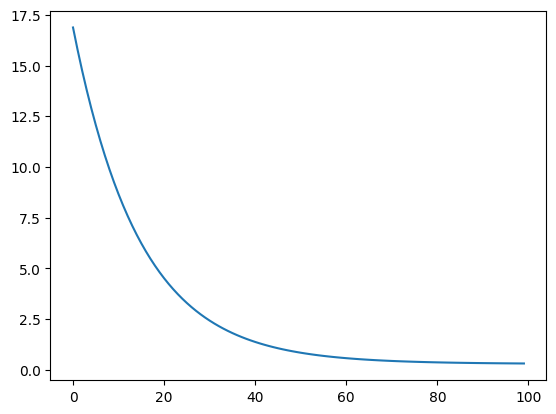

In [11]:

plot_x=np.arange(100)
plot_y=np.array(losses)
plt.plot(plot_x,plot_y)
plt.show()

In [12]:
list=[[1,1,1],[1,1,1],[1,1,1]]
List=[2,5,3]
L=np.array(list).reshape(3,3)
l=np.array(List).reshape(3,1)
l*L


array([[2, 2, 2],
       [5, 5, 5],
       [3, 3, 3]])